# import most library

In [1]:
import pandas as pd 
import string
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
import matplotlib.pyplot as plt

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Enjy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# reading data

In [2]:
data = pd.read_csv('train.txt', names=['Text', 'Emotion'], sep=';')


# information about data

In [3]:
data.shape

(20000, 2)

In [4]:
data.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [5]:
data.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [6]:
data.duplicated().sum()

1

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     20000 non-null  object
 1   Emotion  20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [8]:
data["Emotion"].value_counts()

joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion'>

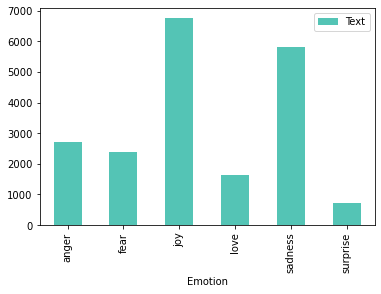

In [9]:
data.groupby('Emotion').count().plot.bar(color='#54c4b5')

# preprocessing

In [10]:
def remove_punctuation(content):
    filteredsents=""
    punct=string.punctuation
    for word in content:
        if word not in punct:
            filteredsents+=word
    filteredsents=re.sub(r'www\.[a-z]?\.?(com)+|[a-z]+\.(com)', '', filteredsents)
    filteredsents = re.sub(r'\d+', '', filteredsents)
    filteredsents = re.sub(r'https?:\/\/\S+', '', filteredsents)
    filteredsents = re.sub(r"[a-z]*'t", " not", filteredsents)
    return filteredsents
data['contentwithoutpunct']=data['Text'].apply(lambda x:remove_punctuation(x.lower()))

In [11]:
data.head(4)

,Text,Emotion,contentwithoutpunct
0,i didnt feel humiliated,sadness,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...


In [12]:
data['contentwithoutpunct'][1]

'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'

In [13]:
def word_tokenization(contentwithoutpunct):
    toknize=word_tokenize(contentwithoutpunct)
    return toknize
data['word_tokenization']=data['contentwithoutpunct'].apply(lambda x:word_tokenization(x))

In [14]:
data.head(4)

,Text,Emotion,contentwithoutpunct,word_tokenization
0,i didnt feel humiliated,sadness,i didnt feel humiliated,"[i, didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ..."
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong,"[im, grabbing, a, minute, to, post, i, feel, g..."
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ..."


In [15]:
data['word_tokenization'][0]

['i', 'didnt', 'feel', 'humiliated']

In [16]:
#stopwords_english=nltk.corpus.stopwords.words('english')
#stopwords_english

In [17]:
stopwords_english=['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'at',
 'by',
 'for',
 'with',
 'about',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'on',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'own',
 's',
 'can',
 'will',
 'just',
 'don'
 'now',
 'll',
 'm',
 'o',
 're',
 've',
 'y',
 'ain',
 'aren',
 'ma']

In [18]:
def stopword_removel(word_tokenization):
    withoutstopword=[]
    for word in word_tokenization:
        if word not in stopwords_english:
            withoutstopword.append(word)
    return withoutstopword
data['withoutstopword']=data['word_tokenization'].apply(lambda x:stopword_removel(x))

In [19]:
data.head(4)

,Text,Emotion,contentwithoutpunct,word_tokenization,withoutstopword
0,i didnt feel humiliated,sadness,i didnt feel humiliated,"[i, didnt, feel, humiliated]","[didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...,"[i, can, go, from, feeling, so, hopeless, to, ...","[go, feeling, so, hopeless, so, damned, hopefu..."
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong,"[im, grabbing, a, minute, to, post, i, feel, g...","[im, grabbing, minute, post, feel, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...,"[i, am, ever, feeling, nostalgic, about, the, ...","[ever, feeling, nostalgic, fireplace, know, st..."


In [20]:
data['withoutstopword'][0]

['didnt', 'feel', 'humiliated']

In [21]:
def Word_Lemmatizer(word_tokenization):
    after_lemmatizer=""
    for word in word_tokenization:
        text=lemmatizer.lemmatize(word)
        after_lemmatizer+=" "
        after_lemmatizer+=text  
    return after_lemmatizer
data['after_lemmatizer']=data['withoutstopword'].apply(lambda x:Word_Lemmatizer(x))

In [22]:
#steaming but lemmatization more accurce 
"""def PorterStemmer(withoutstopword):
    after_steaming=""
    for word in withoutstopword:
        text=ps.stem(word)
        after_steaming+=" "  
        after_steaming+=text
    return after_steaming
data['after_steaming']=data['word_tokenization'].apply(lambda x:PorterStemmer(x))
"""

'def PorterStemmer(withoutstopword):\n    after_steaming=""\n    for word in withoutstopword:\n        text=ps.stem(word)\n        after_steaming+=" "  \n        after_steaming+=text\n    return after_steaming\ndata[\'after_steaming\']=data[\'word_tokenization\'].apply(lambda x:PorterStemmer(x))\n'

# Vectorization

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
v = TfidfVectorizer()
v=v.fit(data['after_lemmatizer'])
transform_output = v.transform(data['after_lemmatizer'])
transform_output.shape

(20000, 15111)

In [25]:
print(v.vocabulary_)

{'didnt': 3592, 'feel': 4891, 'humiliated': 6390, 'go': 5631, 'feeling': 4895, 'so': 12267, 'hopeless': 6301, 'damned': 3170, 'hopeful': 6298, 'around': 709, 'someone': 12338, 'care': 1920, 'awake': 934, 'im': 6520, 'grabbing': 5688, 'minute': 8435, 'post': 10113, 'greedy': 5748, 'wrong': 14956, 'ever': 4552, 'nostalgic': 9040, 'fireplace': 5015, 'know': 7406, 'still': 12685, 'property': 10386, 'grouchy': 5788, 'ive': 7035, 'little': 7777, 'burdened': 1760, 'lately': 7515, 'wasnt': 14581, 'sure': 12996, 'taking': 13144, 'milligram': 8399, 'time': 13497, 'recommended': 10789, 'amount': 470, 'fallen': 4792, 'asleep': 773, 'lot': 7884, 'faster': 4836, 'but': 1791, 'also': 417, 'like': 7708, 'funny': 5396, 'confused': 2661, 'life': 7684, 'teenager': 13253, 'jaded': 7052, 'year': 15009, 'old': 9226, 'man': 8058, 'petronas': 9801, 'performed': 9732, 'well': 14665, 'made': 7992, 'huge': 6368, 'profit': 10344, 'romantic': 11304, 'too': 13576, 'make': 8033, 'suffering': 12913, 'seeing': 11667, 

In [26]:
""" from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
features_cv = vectorizer.fit_transform(data['after_lemmatizer'])
print(features_cv.shape)
print('Sparse Matrix :\n', features_cv)
features_cv = pd.DataFrame(features_cv.toarray())
features_cv.columns = vectorizer.get_feature_names()
features_cv """

" from sklearn.feature_extraction.text import CountVectorizer\nvectorizer = CountVectorizer()\nfeatures_cv = vectorizer.fit_transform(data['after_lemmatizer'])\nprint(features_cv.shape)\nprint('Sparse Matrix :\n', features_cv)\nfeatures_cv = pd.DataFrame(features_cv.toarray())\nfeatures_cv.columns = vectorizer.get_feature_names()\nfeatures_cv "

In [27]:
"""ngram_vect = CountVectorizer(ngram_range=(1,3))
features_ng = ngram_vect.fit_transform(data['after_lemmatizer'])
print(features_ng.shape)
print('Sparse Matrix :\n', features_ng)
features_ng = pd.DataFrame(features_ng.toarray())
features_ng.columns = ngram_vect.get_feature_names()
features_ng"""

"ngram_vect = CountVectorizer(ngram_range=(1,3))\nfeatures_ng = ngram_vect.fit_transform(data['after_lemmatizer'])\nprint(features_ng.shape)\nprint('Sparse Matrix :\n', features_ng)\nfeatures_ng = pd.DataFrame(features_ng.toarray())\nfeatures_ng.columns = ngram_vect.get_feature_names()\nfeatures_ng"

# maping autput 

In [28]:
target=data['Emotion']
map = {
    'joy' :1,
    'sadness':2,
    'anger' :3,
    'fear':4,
    'love':5,
    'surprise':6,
    }
target = target.map(map)


# split_data

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split( transform_output, target, test_size=0.20, random_state = 1 )

# ML Algorithm

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model =LogisticRegression()
emotion=model.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
train_LogisticRegression = model.predict(X_train)
print(classification_report(train_LogisticRegression, y_train))

              precision    recall  f1-score   support

           1       0.98      0.93      0.95      5715
           2       0.98      0.95      0.96      4798
           3       0.93      0.96      0.95      2108
           4       0.91      0.95      0.93      1834
           5       0.82      0.96      0.89      1102
           6       0.76      0.97      0.85       443

    accuracy                           0.95     16000
   macro avg       0.90      0.95      0.92     16000
weighted avg       0.95      0.95      0.95     16000



In [32]:
pred_LogisticRegression = model.predict(X_val)
print(classification_report(pred_LogisticRegression, y_val))

              precision    recall  f1-score   support

           1       0.96      0.83      0.89      1587
           2       0.95      0.90      0.92      1209
           3       0.82      0.92      0.87       481
           4       0.77      0.86      0.82       399
           5       0.61      0.89      0.73       241
           6       0.48      0.88      0.62        83

    accuracy                           0.87      4000
   macro avg       0.77      0.88      0.81      4000
weighted avg       0.89      0.87      0.87      4000



In [33]:
from sklearn.svm import SVC
model = SVC()
emotions=model.fit(X_train,y_train)

In [34]:
train_svm = model.predict(X_train)
print(classification_report(train_svm, y_train))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99      5442
           2       1.00      1.00      1.00      4669
           3       0.99      0.99      0.99      2169
           4       0.99      0.99      0.99      1930
           5       0.95      0.99      0.97      1237
           6       0.97      0.99      0.98       553

    accuracy                           0.99     16000
   macro avg       0.98      0.99      0.99     16000
weighted avg       0.99      0.99      0.99     16000



In [35]:
pred_svm = model.predict(X_val)
print(classification_report(pred_svm, y_val))

              precision    recall  f1-score   support

           1       0.95      0.80      0.87      1644
           2       0.94      0.90      0.92      1190
           3       0.79      0.91      0.84       468
           4       0.77      0.84      0.80       404
           5       0.52      0.88      0.65       205
           6       0.49      0.83      0.61        89

    accuracy                           0.85      4000
   macro avg       0.74      0.86      0.78      4000
weighted avg       0.88      0.85      0.86      4000



In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [37]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [38]:
y_pred_train = classifier.predict(X_train)
y_pred_val = classifier.predict(X_val)
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_val, y_pred_val))

0.729625
0.6675


# saving model

In [39]:
import pickle
with open('v.pickle', 'wb') as handle:
    pickle.dump(v,handle)
filename = 'emotion_detaction.sav'
pickle.dump(emotion, open(filename, 'wb'))